In [216]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [217]:
df=pd.read_csv(r'glass.csv',header= None) #skiprows=1)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


we have called glass identification dataset 

But as we can see we do not have column names for data in dataset

first we have to name for each column

In [219]:
df.rename(columns={0: 'Id number', 1: 'RI', 2: 'Na',3: 'Mg', 4: 'Al', 5: 'Si',6: 'K', 7:'Ca', 8: 'Ba',9: 'Fe', 10: 'Type Of Glass'}, inplace=True)


In [220]:
df.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type Of Glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


so we have renamed all the columns with chemical components

In [221]:
df.shape

(214, 11)

We have 214 no of Rows and 11 no of columns

In [222]:
df.isnull().sum()

Id number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type Of Glass    0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

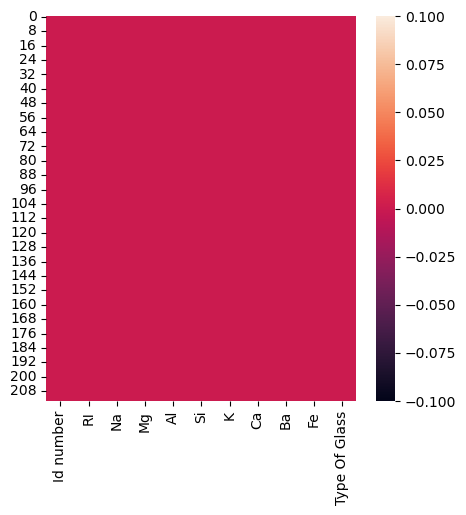

In [223]:
plt.figure(figsize=(5,5))
sns.heatmap(df.isnull())
plt.show

so we have no null values present in our dataset

In [224]:
df.nunique()

Id number        214
RI               178
Na               142
Mg                94
Al               118
Si               133
K                 65
Ca               143
Ba                34
Fe                32
Type Of Glass      6
dtype: int64

as we can see Id number column is will not be contributing any value to the prediction so we have to drop id number columns


In [225]:
df.drop('Id number',axis=1,inplace=True)

In [226]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type Of Glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [227]:
df.shape

(214, 10)

Now after droppind Id number column we have 10 no of columns

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             214 non-null    float64
 1   Na             214 non-null    float64
 2   Mg             214 non-null    float64
 3   Al             214 non-null    float64
 4   Si             214 non-null    float64
 5   K              214 non-null    float64
 6   Ca             214 non-null    float64
 7   Ba             214 non-null    float64
 8   Fe             214 non-null    float64
 9   Type Of Glass  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


here we can check dataset shape 

memory used 18.4kb

all columns data types are float64 and int

In [229]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type Of Glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


by observing this description we can say there might be skewness present in feature columns

and also there is no big difference in 3rd IQR and max value so outliers are might not be present in all the columns night be present in Na, K, Ca columns

Graphical Visualization 

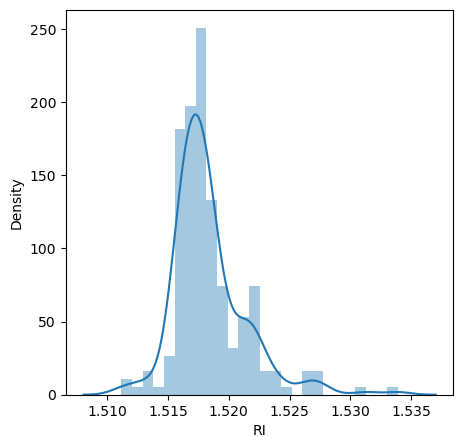

In [230]:
plt.figure(figsize=(5,5))
sns.distplot(df['RI'])
plt.show()

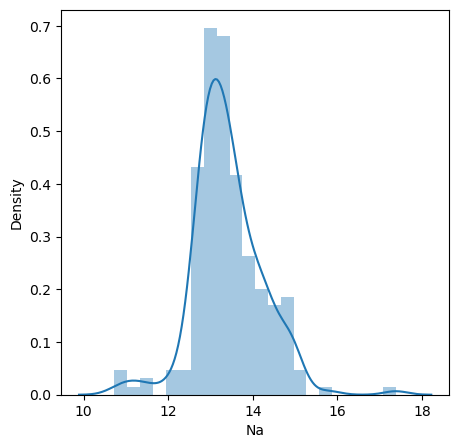

In [231]:
plt.figure(figsize=(5,5))
sns.distplot(df['Na'])
plt.show()

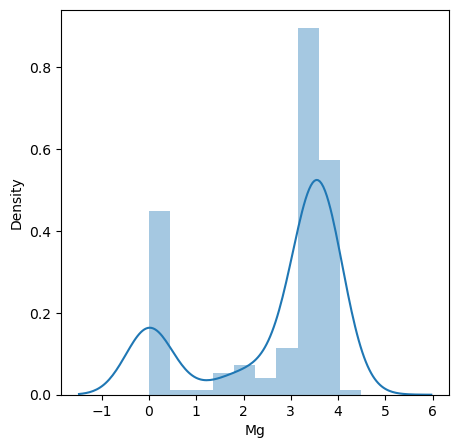

In [232]:
plt.figure(figsize=(5,5))
sns.distplot(df['Mg'])
plt.show()

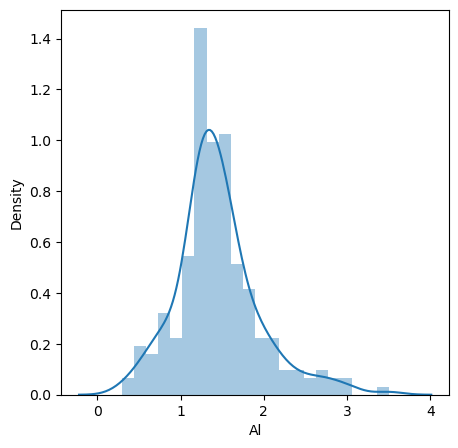

In [233]:
plt.figure(figsize=(5,5))
sns.distplot(df['Al'])
plt.show()

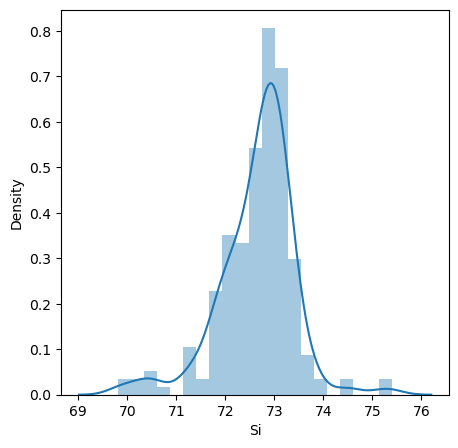

In [234]:
plt.figure(figsize=(5,5))
sns.distplot(df['Si'])
plt.show()

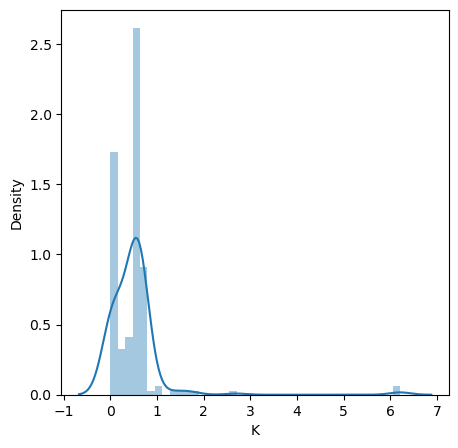

In [235]:
plt.figure(figsize=(5,5))
sns.distplot(df['K'])
plt.show()

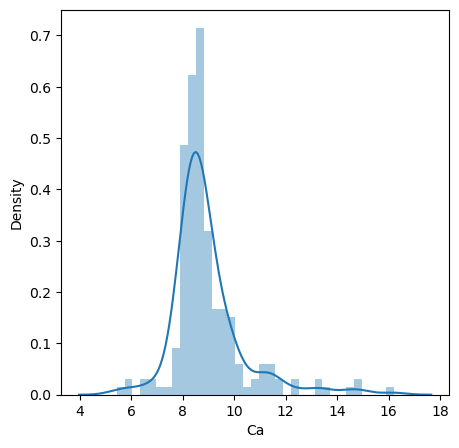

In [236]:
plt.figure(figsize=(5,5))
sns.distplot(df['Ca'])
plt.show()

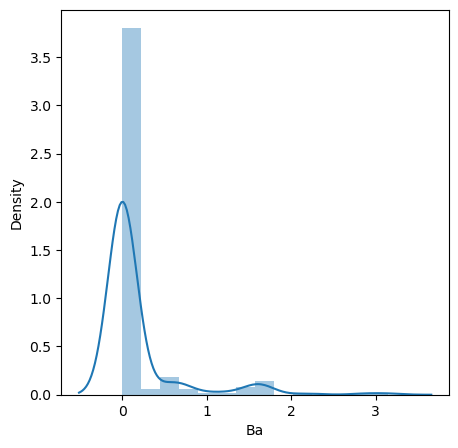

In [237]:
plt.figure(figsize=(5,5))
sns.distplot(df['Ba'])
plt.show()

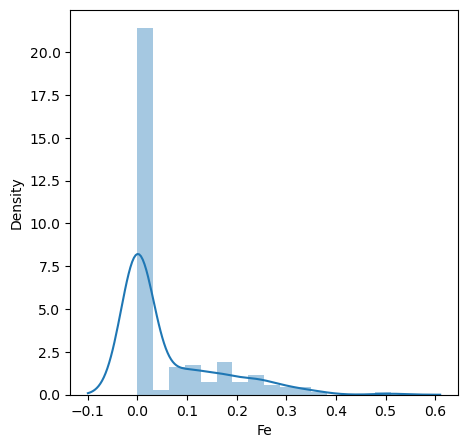

In [238]:
plt.figure(figsize=(5,5))
sns.distplot(df['Fe'])
plt.show()

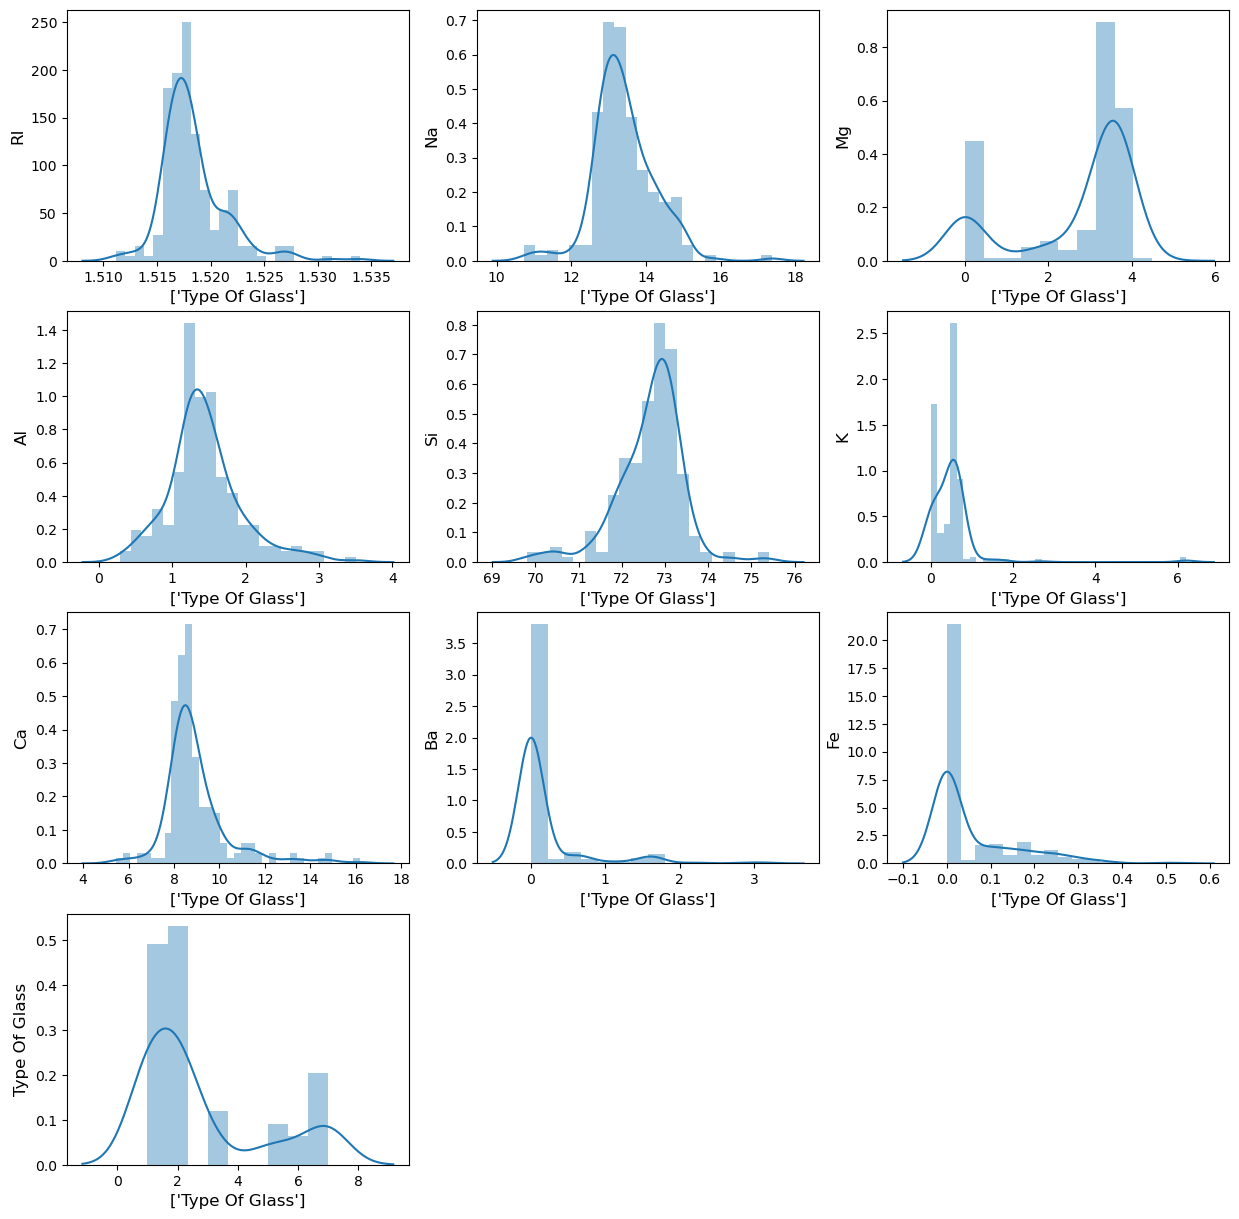

In [239]:
plt.figure(figsize=(15,15))
plot = 1
for col in df.columns:
    if plot<=10:
        plt.subplot(4,3,plot)
        sns.distplot(df[col])
        plt.xlabel(['Type Of Glass'], fontsize = 12)
        plt.ylabel(col, fontsize = 12)
    plot+=1
plt.show()

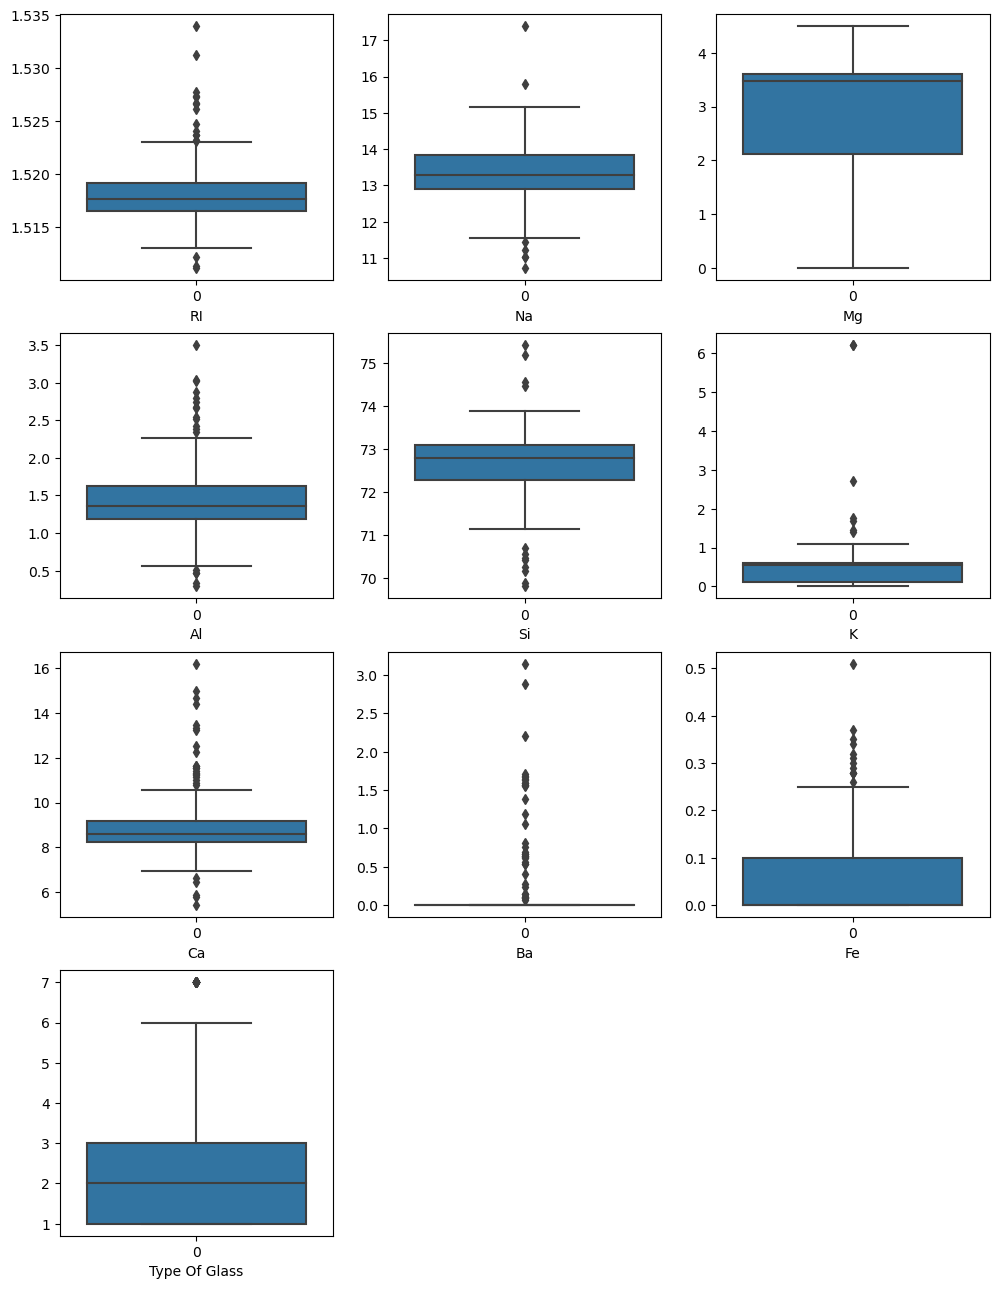

In [240]:
plt.figure(figsize=(12,20))
plot = 1
for col in df:
    if plot<=10:
        plt.subplot(5,3,plot)
        sns.boxplot(df[col])
        plt.xlabel(col)
    plot+=1
plt.show()

we have outliers is almost all the colums we have remove outliers using zscore method but not from the target columns which is Type Of Glass

In [241]:
features = df.drop('Type Of Glass',axis=1)

In [242]:
from scipy.stats import zscore

In [243]:
df1 = df[['RI','Na','Al','Si','K','Ca','Ba','Fe']]
z=np.abs(zscore(df1))
z

,RI,Na,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,0.692442,1.127082,0.671705,0.145766,0.352877,0.586451
1,0.249333,0.591817,0.170460,0.102319,0.026213,0.793734,0.352877,0.586451
2,0.721318,0.149933,0.190912,0.438787,0.164533,0.828949,0.352877,0.586451
3,0.232831,0.242853,0.310994,0.052974,0.112107,0.519052,0.352877,0.586451
4,0.312045,0.169205,0.411375,0.555256,0.081369,0.624699,0.352877,0.586451
...,...,...,...,...,...,...,...,...
209,0.704815,0.898681,2.881125,0.052974,0.640968,0.157088,1.783978,0.586451
210,0.500178,1.856097,1.094342,0.529374,0.763919,0.392276,2.852405,0.586451
211,0.754046,1.168721,1.154570,0.995252,0.763919,0.364103,2.953200,0.586451
212,0.612399,1.193270,0.993960,1.241133,0.763919,0.335931,2.812087,0.586451


Now lets chech are there any value which are > zscore value(3)

In [244]:
np.where(z>3)

(array([105, 106, 106, 106, 106, 106, 107, 107, 107, 110, 111, 112, 112,
        131, 145, 162, 163, 163, 163, 171, 171, 172, 172, 174, 184, 184,
        188, 189, 201, 201, 203, 207, 213], dtype=int64),
 array([5, 0, 1, 3, 5, 6, 0, 3, 5, 5, 5, 0, 5, 5, 7, 7, 2, 3, 6, 2, 4, 2,
        4, 7, 1, 3, 3, 6, 3, 4, 6, 6, 6], dtype=int64))

In [245]:
df1 = df[(z<3).all(axis=1)]
df1.shape

(194, 10)

In [246]:
print('Loss of Data in percentage',((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Loss of Data in percentage 9.345794392523365


Check for skewness

In [247]:
df.skew()

RI               1.625431
Na               0.454181
Mg              -1.152559
Al               0.907290
Si              -0.730447
K                6.551648
Ca               2.047054
Ba               3.416425
Fe               1.754327
Type Of Glass    1.114915
dtype: float64

there is skewness in almost all the columns 

In [248]:
#df['RI'] = np.sqrt(df['RI'])
#df['Mg'] = np.sqrt(df['Mg'])
#df['K'] = np.sqrt(df['K'])
#df['Ca'] = np.sqrt(df['Ca'])
#df['Ba'] = np.sqrt(df['Ba'])
#df['Fe'] = np.sqrt(df['Fe'])

we have used sqrt method but not getting accurate scores

In [249]:
df['RI'] = np.cbrt(df['RI'])
df['Mg'] = np.cbrt(df['Mg'])
df['K'] = np.cbrt(df['K'])
df['Ca'] = np.cbrt(df['Ca'])
df['Ba'] = np.cbrt(df['Ba'])
df['Fe'] = np.cbrt(df['Fe'])

In [250]:
df.skew()

RI               1.617049
Na               0.454181
Mg              -1.440196
Al               0.907290
Si              -0.730447
K               -0.591896
Ca               1.407358
Ba               2.073007
Fe               0.894683
Type Of Glass    1.114915
dtype: float64

and then we have again runned all cells again with cbrt method and with cbrt method we are getting less skewness but not totally removed from some columns there are still skewness present which is acceptable

Lets check correlation between features

In [276]:
cor = df.corr()
cor

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type Of Glass
RI,1.000000,-0.191810,-0.113648,-0.407587,-0.541953,-0.211934,0.802869,-0.092651,0.132621,-0.164422
Na,-0.191810,1.000000,-0.277849,0.156794,-0.069809,-0.539820,-0.264986,0.418626,-0.196921,0.502898
Mg,-0.113648,-0.277849,1.000000,-0.452496,-0.171665,0.442902,-0.398712,-0.548170,0.094472,-0.701285
Al,-0.407587,0.156794,-0.452496,1.000000,-0.005524,0.066251,-0.276597,0.561615,-0.075230,0.598829
Si,-0.541953,-0.069809,-0.171665,-0.005524,1.000000,-0.172056,-0.190635,-0.005974,-0.078194,0.151565
K,-0.211934,-0.539820,0.442902,0.066251,-0.172056,1.000000,-0.352345,-0.350932,0.119291,-0.433255
Ca,0.802869,-0.264986,-0.398712,-0.276597,-0.190635,-0.352345,1.000000,-0.148226,0.116880,-0.009394
Ba,-0.092651,0.418626,-0.548170,0.561615,-0.005974,-0.350932,-0.148226,1.000000,-0.035721,0.663262
Fe,0.132621,-0.196921,0.094472,-0.075230,-0.078194,0.119291,0.116880,-0.035721,1.000000,-0.204767
Type Of Glass,-0.164422,0.502898,-0.701285,0.598829,0.151565,-0.433255,-0.009394,0.663262,-0.204767,1.000000


<Axes: >

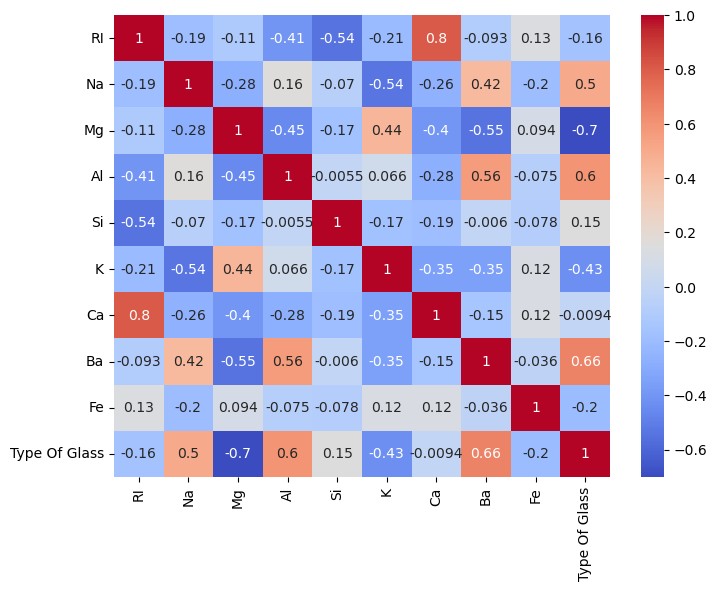

In [267]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [277]:
cor['Type Of Glass'].sort_values(ascending = False)

Type Of Glass    1.000000
Ba               0.663262
Al               0.598829
Na               0.502898
Si               0.151565
Ca              -0.009394
RI              -0.164422
Fe              -0.204767
K               -0.433255
Mg              -0.701285
Name: Type Of Glass, dtype: float64

spitting the data

In [269]:
x = df.drop('Type Of Glass',axis=1)
y = df['Type Of Glass']

In [272]:

x.shape

(214, 9)

In [273]:
y.shape

(214,)

In [274]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.873958,0.284953,0.759032,-0.692442,-1.127082,-0.835901,-0.107657,-0.439469,-0.679381
1,-0.248977,0.591817,0.563835,-0.170460,0.102319,0.346205,-0.841573,-0.439469,-0.679381
2,-0.721771,0.149933,0.551954,0.190912,0.438787,0.188105,-0.883072,-0.439469,-0.679381
3,-0.232451,-0.242853,0.584946,-0.310994,-0.052974,0.485589,-0.523791,-0.439469,-0.679381
4,-0.311778,-0.169205,0.568556,-0.411375,0.555256,0.455958,-0.644800,-0.439469,-0.679381
...,...,...,...,...,...,...,...,...,...
209,-0.705234,0.898681,-1.990475,2.881125,-0.052974,-0.716931,0.217776,2.317817,-0.679381
210,-0.500215,1.856097,-1.990475,1.094342,0.529374,-2.018006,-0.380508,2.716835,-0.679381
211,0.755138,1.168721,-1.990475,1.154570,0.995252,-2.018006,-0.348946,2.749579,-0.679381
212,-0.612638,1.193270,-1.990475,0.993960,1.241133,-2.018006,-0.317483,2.703545,-0.679381


In [279]:
y.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type Of Glass, dtype: int64

# Building The Model

In [280]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [281]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [282]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc = rfc.predict(x_test)
print('The accuracy for RandomForestClassifier is = ',accuracy_score(y_test, predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

The accuracy for RandomForestClassifier is =  0.8
[[18  1  0  0  0  0]
 [ 5 15  1  1  1  0]
 [ 2  0  2  0  0  0]
 [ 0  2  0  4  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0 10]]
              precision    recall  f1-score   support

           1       0.72      0.95      0.82        19
           2       0.83      0.65      0.73        23
           3       0.67      0.50      0.57         4
           5       0.80      0.67      0.73         6
           6       0.75      1.00      0.86         3
           7       1.00      1.00      1.00        10

    accuracy                           0.80        65
   macro avg       0.79      0.79      0.78        65
weighted avg       0.81      0.80      0.79        65



In [283]:
abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
predabc = abc.predict(x_test)
print('The accuracy for AdaBoostClassifier is = ',accuracy_score(y_test,predabc))
print(confusion_matrix(y_test,predabc))
print(classification_report(y_test,predabc))

The accuracy for AdaBoostClassifier is =  0.5076923076923077
[[18  1  0  0  0  0]
 [13  8  0  0  2  0]
 [ 4  0  0  0  0  0]
 [ 0  6  0  0  0  0]
 [ 0  0  0  0  3  0]
 [ 0  6  0  0  0  4]]
              precision    recall  f1-score   support

           1       0.51      0.95      0.67        19
           2       0.38      0.35      0.36        23
           3       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         6
           6       0.60      1.00      0.75         3
           7       1.00      0.40      0.57        10

    accuracy                           0.51        65
   macro avg       0.42      0.45      0.39        65
weighted avg       0.47      0.51      0.45        65



In [293]:
bc = BaggingClassifier()
bc.fit(x_train,y_train)
predbc = bc.predict(x_test)
print('The accuracy for BaggingClassifier is = ',accuracy_score(y_test,predbc))
print(confusion_matrix(y_test,predbc))
print(classification_report(y_test,predbc))

The accuracy for BaggingClassifier is =  0.7538461538461538
[[16  3  0  0  0  0]
 [ 5 15  1  0  1  1]
 [ 2  0  2  0  0  0]
 [ 0  2  0  4  0  0]
 [ 1  0  0  0  2  0]
 [ 0  0  0  0  0 10]]
              precision    recall  f1-score   support

           1       0.67      0.84      0.74        19
           2       0.75      0.65      0.70        23
           3       0.67      0.50      0.57         4
           5       1.00      0.67      0.80         6
           6       0.67      0.67      0.67         3
           7       0.91      1.00      0.95        10

    accuracy                           0.75        65
   macro avg       0.78      0.72      0.74        65
weighted avg       0.76      0.75      0.75        65



In [284]:
etc = ExtraTreesClassifier()
etc.fit(x_train,y_train)
predetc = etc.predict(x_test)
print('The accuracy for ExtraTreesClassifier is = ',accuracy_score(y_test,predetc))
print(confusion_matrix(y_test,predetc))
print(classification_report(y_test,predetc))

The accuracy for ExtraTreesClassifier is =  0.7538461538461538
[[17  2  0  0  0  0]
 [ 6 15  0  1  1  0]
 [ 1  1  2  0  0  0]
 [ 0  4  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0 10]]
              precision    recall  f1-score   support

           1       0.71      0.89      0.79        19
           2       0.68      0.65      0.67        23
           3       1.00      0.50      0.67         4
           5       0.67      0.33      0.44         6
           6       0.75      1.00      0.86         3
           7       1.00      1.00      1.00        10

    accuracy                           0.75        65
   macro avg       0.80      0.73      0.74        65
weighted avg       0.76      0.75      0.74        65



In [285]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
predtc = dtc.predict(x_test)
print('The accuracy for DecisionTreeClassifier is = ',accuracy_score(y_test,predtc))
print(confusion_matrix(y_test,predtc))
print(classification_report(y_test,predtc))

The accuracy for DecisionTreeClassifier is =  0.676923076923077
[[12  2  4  0  0  1]
 [ 6 13  2  1  1  0]
 [ 0  1  3  0  0  0]
 [ 0  0  0  4  1  1]
 [ 0  0  0  0  3  0]
 [ 0  1  0  0  0  9]]
              precision    recall  f1-score   support

           1       0.67      0.63      0.65        19
           2       0.76      0.57      0.65        23
           3       0.33      0.75      0.46         4
           5       0.80      0.67      0.73         6
           6       0.60      1.00      0.75         3
           7       0.82      0.90      0.86        10

    accuracy                           0.68        65
   macro avg       0.66      0.75      0.68        65
weighted avg       0.71      0.68      0.68        65



In [286]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print('The accuracy of KNeighborsClassifier is = ',accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

The accuracy of KNeighborsClassifier is =  0.6307692307692307
[[16  3  0  0  0  0]
 [ 9 13  0  0  1  0]
 [ 2  2  0  0  0  0]
 [ 1  4  0  1  0  0]
 [ 0  0  0  0  2  1]
 [ 0  1  0  0  0  9]]
              precision    recall  f1-score   support

           1       0.57      0.84      0.68        19
           2       0.57      0.57      0.57        23
           3       0.00      0.00      0.00         4
           5       1.00      0.17      0.29         6
           6       0.67      0.67      0.67         3
           7       0.90      0.90      0.90        10

    accuracy                           0.63        65
   macro avg       0.62      0.52      0.52        65
weighted avg       0.63      0.63      0.59        65



In [287]:
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print('The accuracy of SVC is = ',accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

The accuracy of SVC is =  0.676923076923077
[[15  4  0  0  0  0]
 [ 7 15  0  0  1  0]
 [ 2  2  0  0  0  0]
 [ 0  4  0  2  0  0]
 [ 0  1  0  0  2  0]
 [ 0  0  0  0  0 10]]
              precision    recall  f1-score   support

           1       0.62      0.79      0.70        19
           2       0.58      0.65      0.61        23
           3       0.00      0.00      0.00         4
           5       1.00      0.33      0.50         6
           6       0.67      0.67      0.67         3
           7       1.00      1.00      1.00        10

    accuracy                           0.68        65
   macro avg       0.64      0.57      0.58        65
weighted avg       0.66      0.68      0.65        65



Cross Validation Score

In [288]:
from sklearn.model_selection import cross_val_score

In [289]:
score = cross_val_score(rfc,x,y)
print(score)
print(score.mean())
print('difference in accuracy',accuracy_score(y_test,predrfc)-score.mean())

[0.6744186  0.72093023 0.62790698 0.58139535 0.76190476]
0.6733111849390919
difference in accuracy 0.12668881506090812


In [291]:
score1 = cross_val_score(abc,x,y)
print(score1)
print(score1.mean())
print('difference in accuracy',accuracy_score(y_test,predabc)-score1.mean())

[0.41860465 0.30232558 0.39534884 0.18604651 0.4047619 ]
0.3414174972314507
difference in accuracy 0.16627481046085696


In [294]:
score2 = cross_val_score(bc,x,y)
print(score2)
print(score2.mean())
print('difference in accuracy',accuracy_score(y_test,predbc)-score2.mean())

[0.6744186  0.60465116 0.60465116 0.60465116 0.71428571]
0.640531561461794
difference in accuracy 0.11331459238435981


In [296]:
score3 = cross_val_score(dtc,x,y)
print(score3)
print(score3.mean())
print('difference in accuracy',accuracy_score(y_test,predtc)-score3.mean())

[0.60465116 0.53488372 0.72093023 0.41860465 0.5952381 ]
0.5748615725359911
difference in accuracy 0.10206150438708583


In [297]:
score4 = cross_val_score(knn,x,y)
print(score4)
print(score4.mean())
print('difference in accuracy',accuracy_score(y_test,predknn)-score4.mean())

[0.60465116 0.72093023 0.48837209 0.62790698 0.64285714]
0.6169435215946844
difference in accuracy 0.013825709174546397


In [298]:
score5 = cross_val_score(etc,x,y)
print(score5)
print(score5.mean())
print('The difference in accuracy',accuracy_score(y_test,predetc))

[0.62790698 0.74418605 0.62790698 0.6744186  0.66666667]
0.6682170542635658
The difference in accuracy 0.7538461538461538


In [299]:
score6 = cross_val_score(svc,x,y)
print(score6)
print(score6.mean())
print('The difference in accuracy',accuracy_score(y_test,predsvc))

[0.58139535 0.72093023 0.51162791 0.74418605 0.64285714]
0.6401993355481728
The difference in accuracy 0.676923076923077


RandomForestClassifier is giving least difference in accuracy and best performing accuracy

RandomForestClassifier is best model

In [301]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

In [302]:
from sklearn.model_selection import GridSearchCV

In [312]:
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [314]:
predrfc = grid_search.predict(x_test)
acc = accuracy_score(y_test,predrfc)
print(acc*100)

80.0


In [306]:
grid_search.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [307]:
best_model = grid_search.best_estimator_
best_model

RandomForestClassifier(max_depth=20, n_estimators=200)

# Saving the Model
using joblib

In [318]:
import joblib

In [319]:
joblib.dump(grid_search,'Glass_prediction.pkl')

['Glass_prediction.pkl']

In [320]:
model = joblib.load('Glass_prediction.pkl')
model

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [322]:
pred_X = model.predict(x_test)
pred_X

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 3, 6, 2, 1, 2, 6, 5, 7, 1, 1, 6, 2, 7,
       7, 7, 3, 2, 1, 1, 2, 1, 1, 2, 3, 2, 1, 7, 5, 1, 1, 2, 2, 7, 1, 2,
       1, 6, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 7, 2, 5, 1, 2, 2, 1, 7, 2],
      dtype=int64)

In [324]:
data = pd.DataFrame({'model predicted':pred_X,'original':y_test})
data

,model predicted,original
9,1,1
197,7,7
66,1,1
191,7,7
117,2,2
...,...,...
5,2,1
135,2,2
56,1,1
199,7,7
